# Hmwk #1

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## #1

In [3]:
df = pd.read_csv("weather.csv", header=0, index_col=0)
df

,outlook,temperature,humidity,windy,play
Day,,,,,
1,sunny,85,85,False,no
2,sunny,80,90,True,no
3,overcast,83,86,False,yes
4,rainy,70,96,False,yes
5,rainy,68,80,False,yes
6,rainy,65,70,True,no
7,overcast,64,65,True,yes
8,sunny,72,95,False,no
9,sunny,69,70,False,yes


In [4]:
mean_temp = df["temperature"].mean()
mean_temp

73.571428571428569

In [5]:
mean_humidity = df["humidity"].mean()
mean_humidity

81.642857142857139

In [6]:
temp_selector = df['temperature'] > mean_temp
df[temp_selector][["outlook", "play"]]

,outlook,play
Day,,
1,sunny,no
2,sunny,no
3,overcast,yes
10,rainy,yes
11,sunny,yes
13,overcast,yes


In [7]:
humidity_selector = df['humidity'] > mean_humidity
df[humidity_selector][["outlook", "play"]]

,outlook,play
Day,,
1,sunny,no
2,sunny,no
3,overcast,yes
4,rainy,yes
8,sunny,no
12,overcast,yes
14,rainy,no


In [8]:
df["temp_C"] = ( df["temperature"] - 32 ) * (5/9.0)
df

,outlook,temperature,humidity,windy,play,temp_C
Day,,,,,,
1,sunny,85,85,False,no,29.444444
2,sunny,80,90,True,no,26.666667
3,overcast,83,86,False,yes,28.333333
4,rainy,70,96,False,yes,21.111111
5,rainy,68,80,False,yes,20.000000
6,rainy,65,70,True,no,18.333333
7,overcast,64,65,True,yes,17.777778
8,sunny,72,95,False,no,22.222222
9,sunny,69,70,False,yes,20.555556


### #1

In [9]:
play_selector = df["play"]=="yes"

play_days = df[play_selector]
len(play_days)

9

### #2

In [10]:
sunny_selector = df["outlook"]=="sunny"

sunny_play_days = df[sunny_selector & play_selector]
len(sunny_play_days)

2

### #3

*Compare the average, minimum and maximum temperature when you play tennis? *

In [11]:
print play_days["temperature"].mean()
print play_days["temperature"].min()
print play_days["temperature"].max()

73.0
64
83


### #4

*Compare the average, minimum and maximum humidity when you play tennis?*

In [12]:
print play_days["humidity"].mean()
print play_days["humidity"].min()
print play_days["humidity"].max()

79.1111111111
65
96


### #5

*Plot the an scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis.*

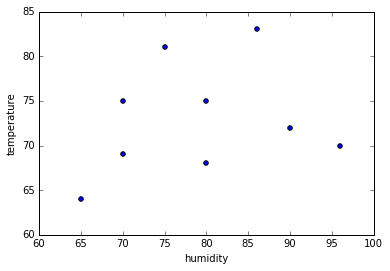

In [13]:
play_days.plot(x='humidity', y='temperature', kind='scatter')

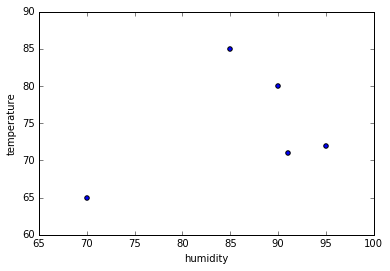

In [14]:
no_play_days = df[df["play"]=="no"]
no_play_days.plot(x='humidity', y='temperature', kind='scatter')

## #2

We have a set of 8 files where the first 7 and the last 2 have a different format. First I removed the header information from the files and removed any superfolous line breaks, I then read them into pandas in two respective groups. I then had to normalize the dates of teh second dataset to match the dates of the first. Also I had to normalize the values of the first dataset b/c they were in units of 1000, so I made it in units of 1.

### Cleaning & Normalization

In [17]:
#these are in units of thousands, need to scale
df1 = pd.read_fwf("processed/st0009ts.txt", header=0, index_col=0, thousands=",").transpose()
df2 = pd.read_fwf("processed/st1019ts.txt", header=0, index_col=0, thousands=",").transpose()
df3 = pd.read_fwf("processed/st2029ts.txt", header=0, index_col=0, thousands=",").transpose()
df4 = pd.read_fwf("processed/st3039ts.txt", header=0, index_col=0, thousands=",").transpose()
df5 = pd.read_fwf("processed/st4049ts.txt", header=0, index_col=0, thousands=",").transpose()
df6 = pd.read_fwf("processed/st5060ts.txt", header=0, index_col=0, thousands=",").transpose()
df7 = pd.read_fwf("processed/st6070ts.txt", header=0, index_col=0, thousands=",").transpose()
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

#scale up to unit of 1
df = df.apply(lambda x: x*1000)

#for some reason, this dataset format uses '.'s in U.S. but doesn't for anything else. We'll normalize it here
df[["U.S."]]
df.rename(columns={'U.S.': 'US'}, inplace=True)

In [18]:
#the file format changes here
transform = lambda x: "19"+x[2:4]
df_9 = pd.read_fwf("processed/st7080ts.txt", header=0, index_col=0, thousands=",").transpose()
df_9.index = df_9.index.map(transform)
df_10 = pd.read_fwf("processed/st8090ts.txt", header=0, index_col=0, thousands=",").transpose()
df_10.index = df_10.index.map(transform)
df_10

df_2 = pd.concat([df_9, df_10])

### Merging

In [19]:
# now merge the two together to get the compleete mergered df
df = pd.concat([df, df_2])
#sort
df=df.sort_index()

### Plot CA vs AK

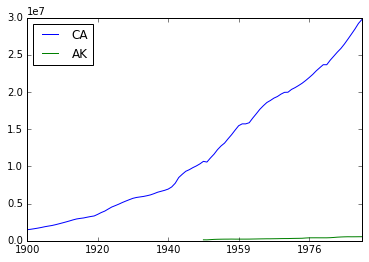

In [20]:
df[["CA", "AK"]].plot()

### New England vs Southwest

In order to plot these values I have to do some feature engineering to create columns for the respective regions that are not in the original dataset. 

For New England I used: CT, ME, MA, NH, RI, VT

The state composition of the southwest is a little more nebelous. I used: AZ, NM, UT, NV

#### Feature Engineering

In [21]:
df["New England"] = df[["CT", "ME", "MA", "NH", "RI", "VT"]].sum(axis=1)
df["Southwest"] = df[["AZ", "NM", "UT", "NV"]].sum(axis=1) 

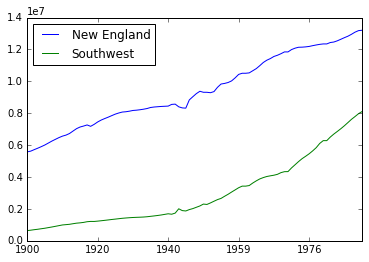

In [22]:
df[["New England", "Southwest"]].plot()

### Greatest Change in Population

We can quantify population growth in direct terms or relativly using percentages:

#### Magnitude Delta

We don't have measurements for Alaska  until 1950, so if we compare growth from 1950 in terms of pure magnitude, the top states are shown below:

In [23]:
delta = {}
rel_delta={}
for state in df.columns:
    delta[state]=df[state].iloc[-1] - df[state].iloc[50]
    rel_delta[state] = (df[state].iloc[-1] - df[state].iloc[50]) / df[state].iloc[50]*1. * 100
    
ddf=pd.DataFrame(delta, index=["delta"]).transpose()
ddf = ddf.sort(["delta"], ascending=False)
ddf.head()

,delta
US,96841873
CA,19083021
FL,10127926
TX,9210510
Southwest,5801980


#### Relative Growth

We can also measure growth as a percenagte difference: As you can see Nevada had the largest percent growth from 1950 to 1900

In [24]:
ddp=pd.DataFrame(rel_delta, index=["% change"]).transpose()
ddp = ddp.sort(["% change"], ascending=False)
ddp.head()

,% change
NV,600.000000
AK,307.439259
FL,300.000000
AZ,300.000000
Southwest,200.000000


Some states had no net growth and some had negative growth:

In [25]:
ddp.tail(n=10)

,% change
MT,0
AL,0
WY,0
DC,-100
WV,-100
Midwest,NaN
North Central,NaN
Northeast,NaN
South,NaN
West,NaN
